In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "archive (1)\\seg_train\\seg_train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "archive (1)\\seg_train\\seg_train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "archive (1)\\seg_test\\seg_test",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(6,activation="softmax"))

    model.summary()

    return model

In [3]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history = model12.fit_generator(
    train,
    epochs=50,
    validation_data=val
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 128)      5

C:\Users\MTG\AppData\Local\Temp\ipykernel_15520\2963433270.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model12.fit_generator(


Epoch 1/50
2808/2808 [==============================] - 290s 99ms/step - loss: 1.7127 - acc: 0.4094 - val_loss: 1.2566 - val_acc: 0.5596
Epoch 2/50
2808/2808 [==============================] - 216s 77ms/step - loss: 1.2955 - acc: 0.5134 - val_loss: 3.3666 - val_acc: 0.4226
Epoch 3/50
2808/2808 [==============================] - 199s 71ms/step - loss: 1.1735 - acc: 0.5723 - val_loss: 0.9116 - val_acc: 0.6890
Epoch 4/50
2808/2808 [==============================] - 192s 68ms/step - loss: 1.0917 - acc: 0.6091 - val_loss: 1.2858 - val_acc: 0.6009
Epoch 5/50
2808/2808 [==============================] - 195s 70ms/step - loss: 1.0347 - acc: 0.6362 - val_loss: 0.9271 - val_acc: 0.6658
Epoch 6/50
2808/2808 [==============================] - 200s 71ms/step - loss: 0.9942 - acc: 0.6528 - val_loss: 0.6324 - val_acc: 0.7803
Epoch 7/50
2808/2808 [==============================] - 187s 67ms/step - loss: 0.9611 - acc: 0.6611 - val_loss: 0.8616 - val_acc: 0.7001
Epoch 8/50
2808/2808 [===================

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model12.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

C:\Users\MTG\AppData\Local\Temp\ipykernel_15520\3413403080.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model12.predict_generator(test)


3000

In [5]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)
cm

array([[ 79,  73,  64,  88,  70,  63],
       [ 64,  69,  86, 102,  75,  78],
       [ 80,  90,  91, 115,  88,  89],
       [ 81,  81,  96, 111,  72,  84],
       [ 71,  74,  83, 119,  80,  83],
       [ 50,  77, 105, 104,  79,  86]], dtype=int64)

In [6]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

   buildings     0.1859    0.1808    0.1833       437
      forest     0.1487    0.1456    0.1471       474
     glacier     0.1733    0.1646    0.1688       553
    mountain     0.1737    0.2114    0.1907       525
         sea     0.1724    0.1569    0.1643       510
      street     0.1781    0.1717    0.1748       501

    accuracy                         0.1720      3000
   macro avg     0.1720    0.1718    0.1715      3000
weighted avg     0.1720    0.1720    0.1716      3000



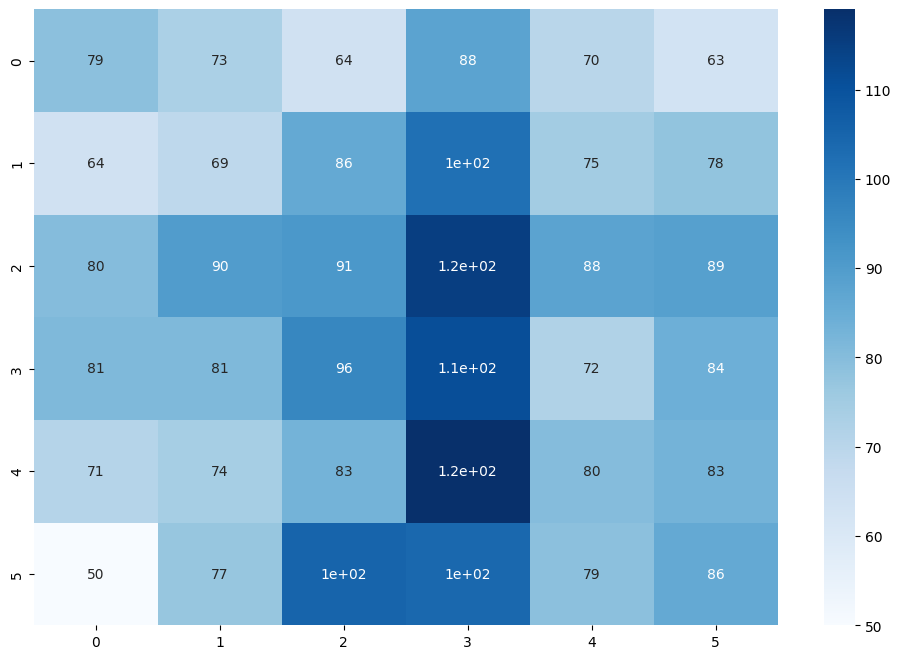

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()